# Import Packages and Mount Google Drive

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sp
import seaborn as sb
import pywt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


.

.

.

.

# Load Raw dataset (540 files)

- Normal Dataset (Normal_1 ~ 180): Robotic Spot-Welding (RSW) data collected under normal process condition.
- Abnormal 1 Dataset (Abnormal1_1 ~ 180): RSW data collected under an abnormal process condition (Electrode tip wear).
- Abnormal 2 Dataset (Abnormal2_1 ~ 180): RSW data collected under an abnormal process condition (Electrode misalignment).

In [3]:
# Define the size of dataset, number of sensor and features
NoOfData    = 180  # 180 Data for each robotic spot-welding condition (Normal, Abnormal)
NoOfSensor  = 3    # 3 Sensor signals: Acceleration, Voltage, Current
NoOfFeature = 10   # 10 Feature types: Max, Min, Mean, RMS, Variance, Skewness, Kurtosis, Crest factor, Shape factor, Impulse factor

# Load all data from github
for i in range(NoOfData):
    
    temp_path1 = 'https://github.com/Eunseob/purdue_me597/blob/main/ml_tutorial/Dataset_3class/Normal_%d?raw=true'%(i+1)    # File path of temporary normal data
    temp_path2 = 'https://github.com/Eunseob/purdue_me597/blob/main/ml_tutorial/Dataset_3class/Abnormal1_%d?raw=true'%(i+1) # File path of temporary abnormal(1) data
    temp_path3 = 'https://github.com/Eunseob/purdue_me597/blob/main/ml_tutorial/Dataset_3class/Abnormal2_%d?raw=true'%(i+1) # File path of temporary abnormal(2) data

    exec("Normal_%d     = pd.read_csv(temp_path1 , skiprows=1, names=['time(s)', 'acceleration(g)', 'voltage(V)', 'current(kA)'])"%(i+1))
    exec("Abnormal_1_%d = pd.read_csv(temp_path2 , skiprows=1, names=['time(s)', 'acceleration(g)', 'voltage(V)', 'current(kA)'])"%(i+1))
    exec("Abnormal_2_%d = pd.read_csv(temp_path3 , skiprows=1, names=['time(s)', 'acceleration(g)', 'voltage(V)', 'current(kA)'])"%(i+1))

.

.

.

.

# Feature Extraction
1. Extract time domain features: 
  - 3 sensors * 10 features = 30 features
2. Extract frequency domain features (from WT-based 8 coefficients):
  - 3 sensors * 8 WT-levels * 10 features = 240 features


In [4]:
# Definition of rms function
def rms(x): 
    return np.sqrt(np.mean(x**2))

### Time domain features

In [5]:
# Create empty(0) arrays for normal/abnormal_1/abnormal_2 feature dataset (time domain)
TimeFeature_Normal     = np.zeros((NoOfSensor*NoOfFeature , NoOfData))
TimeFeature_Abnormal_1 = np.zeros((NoOfSensor*NoOfFeature , NoOfData))
TimeFeature_Abnormal_2 = np.zeros((NoOfSensor*NoOfFeature , NoOfData))

print(TimeFeature_Normal.shape)
print(TimeFeature_Abnormal_1.shape)
print(TimeFeature_Abnormal_2.shape)

(30, 180)
(30, 180)
(30, 180)


In [6]:
for i in range(NoOfData):
    
    # Declare temporary data
    exec("temp_data1 = Normal_%d"%(i+1))
    exec("temp_data2 = Abnormal_1_%d"%(i+1))
    exec("temp_data3 = Abnormal_2_%d"%(i+1))
    
    # Time domain feature extraction
    for j in range(NoOfSensor):
        
        # Normal features
        TimeFeature_Normal[NoOfFeature*j+0, i] = np.max(temp_data1.iloc[:,j+1])
        TimeFeature_Normal[NoOfFeature*j+1, i] = np.min(temp_data1.iloc[:,j+1])
        TimeFeature_Normal[NoOfFeature*j+2, i] = np.mean(temp_data1.iloc[:,j+1])
        TimeFeature_Normal[NoOfFeature*j+3, i] = rms(temp_data1.iloc[:,j+1])
        TimeFeature_Normal[NoOfFeature*j+4, i] = np.var(temp_data1.iloc[:,j+1])
        TimeFeature_Normal[NoOfFeature*j+5, i] = sp.skew(temp_data1.iloc[:,j+1])
        TimeFeature_Normal[NoOfFeature*j+6, i] = sp.kurtosis(temp_data1.iloc[:,j+1])
        TimeFeature_Normal[NoOfFeature*j+7, i] = np.max(temp_data1.iloc[:,j+1])/rms(temp_data1.iloc[:,j+1])
        TimeFeature_Normal[NoOfFeature*j+8, i] = rms(temp_data1.iloc[:,j+1])/np.mean(np.abs(temp_data1.iloc[:,j+1]))
        TimeFeature_Normal[NoOfFeature*j+9, i] = np.max(temp_data1.iloc[:,j+1])/np.mean(np.abs(temp_data1.iloc[:,j+1]))
        
        # Abnormal_1 (Tip wear) features
        TimeFeature_Abnormal_1[NoOfFeature*j+0, i] = np.max(temp_data2.iloc[:,j+1])
        TimeFeature_Abnormal_1[NoOfFeature*j+1, i] = np.min(temp_data2.iloc[:,j+1])
        TimeFeature_Abnormal_1[NoOfFeature*j+2, i] = np.mean(temp_data2.iloc[:,j+1])
        TimeFeature_Abnormal_1[NoOfFeature*j+3, i] = rms(temp_data2.iloc[:,j+1])
        TimeFeature_Abnormal_1[NoOfFeature*j+4, i] = np.var(temp_data2.iloc[:,j+1])
        TimeFeature_Abnormal_1[NoOfFeature*j+5, i] = sp.skew(temp_data2.iloc[:,j+1])
        TimeFeature_Abnormal_1[NoOfFeature*j+6, i] = sp.kurtosis(temp_data2.iloc[:,j+1])
        TimeFeature_Abnormal_1[NoOfFeature*j+7, i] = np.max(temp_data2.iloc[:,j+1])/rms(temp_data2.iloc[:,j+1])
        TimeFeature_Abnormal_1[NoOfFeature*j+8, i] = rms(temp_data2.iloc[:,j+1])/np.mean(np.abs(temp_data2.iloc[:,j+1]))
        TimeFeature_Abnormal_1[NoOfFeature*j+9, i] = np.max(temp_data2.iloc[:,j+1])/np.mean(np.abs(temp_data2.iloc[:,j+1]))

        # Abnormal_2 (Misalignment) features
        TimeFeature_Abnormal_2[NoOfFeature*j+0, i] = np.max(temp_data3.iloc[:,j+1])
        TimeFeature_Abnormal_2[NoOfFeature*j+1, i] = np.min(temp_data3.iloc[:,j+1])
        TimeFeature_Abnormal_2[NoOfFeature*j+2, i] = np.mean(temp_data3.iloc[:,j+1])
        TimeFeature_Abnormal_2[NoOfFeature*j+3, i] = rms(temp_data3.iloc[:,j+1])
        TimeFeature_Abnormal_2[NoOfFeature*j+4, i] = np.var(temp_data3.iloc[:,j+1])
        TimeFeature_Abnormal_2[NoOfFeature*j+5, i] = sp.skew(temp_data3.iloc[:,j+1])
        TimeFeature_Abnormal_2[NoOfFeature*j+6, i] = sp.kurtosis(temp_data3.iloc[:,j+1])
        TimeFeature_Abnormal_2[NoOfFeature*j+7, i] = np.max(temp_data3.iloc[:,j+1])/rms(temp_data3.iloc[:,j+1])
        TimeFeature_Abnormal_2[NoOfFeature*j+8, i] = rms(temp_data3.iloc[:,j+1])/np.mean(np.abs(temp_data3.iloc[:,j+1]))
        TimeFeature_Abnormal_2[NoOfFeature*j+9, i] = np.max(temp_data3.iloc[:,j+1])/np.mean(np.abs(temp_data3.iloc[:,j+1]))

# Combine Normal + Abnormal_1 + Abnormal_2 (axis=1)
TimeFeature = np.concatenate([TimeFeature_Normal, TimeFeature_Abnormal_1, TimeFeature_Abnormal_2] , axis=1)
TimeFeature.shape

(30, 540)

### Frequency domain features (WT-based)

In [7]:
# Wavelet options
MotherWavelet = pywt.Wavelet('haar')   # Mother wavelet
Level   = 8                            # Wavelet decomposition level

In [8]:
# Create empty(0) arrays for normal/abnormal feature dataset (frequency Domain)
FreqFeature_Normal     = np.zeros(shape=(NoOfSensor*NoOfFeature*Level , NoOfData))
FreqFeature_Abnormal_1 = np.zeros(shape=(NoOfSensor*NoOfFeature*Level , NoOfData))
FreqFeature_Abnormal_2 = np.zeros(shape=(NoOfSensor*NoOfFeature*Level , NoOfData))

print(FreqFeature_Normal.shape)
print(FreqFeature_Abnormal_1.shape)
print(FreqFeature_Abnormal_2.shape)

(240, 180)
(240, 180)
(240, 180)


In [9]:
for i in range(NoOfData):
    
    # Declare temporary data (only sensor signals)
    exec("temp_data1 = Normal_%d.iloc[:,1:]"%(i+1))
    exec("temp_data2 = Abnormal_1_%d.iloc[:,1:]"%(i+1))
    exec("temp_data3 = Abnormal_2_%d.iloc[:,1:]"%(i+1))

    # Walvelet decomposition
    Coef1 = pywt.wavedec(temp_data1, MotherWavelet, level=Level, axis=0)
    Coef2 = pywt.wavedec(temp_data2, MotherWavelet, level=Level, axis=0)
    Coef3 = pywt.wavedec(temp_data3, MotherWavelet, level=Level, axis=0)
    
    # Frequency domain feature extraction
    for j in range(NoOfSensor):
        
        for k in np.arange(Level):
            coef1 = Coef1[Level-k]
            coef2 = Coef2[Level-k]
            coef3 = Coef3[Level-k]
            
            # Normal features
            FreqFeature_Normal[NoOfFeature*j*Level+k*NoOfFeature+0 , i] = np.max(coef1[:,j])
            FreqFeature_Normal[NoOfFeature*j*Level+k*NoOfFeature+1 , i] = np.min(coef1[:,j])
            FreqFeature_Normal[NoOfFeature*j*Level+k*NoOfFeature+2 , i] = np.mean(coef1[:,j])
            FreqFeature_Normal[NoOfFeature*j*Level+k*NoOfFeature+3 , i] = rms(coef1[:,j])
            FreqFeature_Normal[NoOfFeature*j*Level+k*NoOfFeature+4 , i] = np.var(coef1[:,j])
            FreqFeature_Normal[NoOfFeature*j*Level+k*NoOfFeature+5 , i] = sp.skew(coef1[:,j])
            FreqFeature_Normal[NoOfFeature*j*Level+k*NoOfFeature+6 , i] = sp.kurtosis(coef1[:,j])
            FreqFeature_Normal[NoOfFeature*j*Level+k*NoOfFeature+7 , i] = np.max(coef1[:,j])/rms(coef1[:,j])
            FreqFeature_Normal[NoOfFeature*j*Level+k*NoOfFeature+8 , i] = rms(coef1[:,j])/np.mean(np.abs(coef1[:,j]))
            FreqFeature_Normal[NoOfFeature*j*Level+k*NoOfFeature+9 , i] = np.max(coef1[:,j])/np.mean(np.abs(coef1[:,j]))
            
            # Abnormal_1 (Tip wear) features
            FreqFeature_Abnormal_1[NoOfFeature*j*Level+k*NoOfFeature+0 , i] = np.max(coef2[:,j])
            FreqFeature_Abnormal_1[NoOfFeature*j*Level+k*NoOfFeature+1 , i] = np.min(coef2[:,j])
            FreqFeature_Abnormal_1[NoOfFeature*j*Level+k*NoOfFeature+2 , i] = np.mean(coef2[:,j])
            FreqFeature_Abnormal_1[NoOfFeature*j*Level+k*NoOfFeature+3 , i] = rms(coef2[:,j])
            FreqFeature_Abnormal_1[NoOfFeature*j*Level+k*NoOfFeature+4 , i] = np.var(coef2[:,j])
            FreqFeature_Abnormal_1[NoOfFeature*j*Level+k*NoOfFeature+5 , i] = sp.skew(coef2[:,j])
            FreqFeature_Abnormal_1[NoOfFeature*j*Level+k*NoOfFeature+6 , i] = sp.kurtosis(coef2[:,j])
            FreqFeature_Abnormal_1[NoOfFeature*j*Level+k*NoOfFeature+7 , i] = np.max(coef2[:,j])/rms(coef2[:,j])
            FreqFeature_Abnormal_1[NoOfFeature*j*Level+k*NoOfFeature+8 , i] = rms(coef2[:,j])/np.mean(np.abs(coef2[:,j]))
            FreqFeature_Abnormal_1[NoOfFeature*j*Level+k*NoOfFeature+9 , i] = np.max(coef2[:,j])/np.mean(np.abs(coef2[:,j]))

            # Abnormal_2 (Misalignment) features
            FreqFeature_Abnormal_2[NoOfFeature*j*Level+k*NoOfFeature+0 , i] = np.max(coef3[:,j])
            FreqFeature_Abnormal_2[NoOfFeature*j*Level+k*NoOfFeature+1 , i] = np.min(coef3[:,j])
            FreqFeature_Abnormal_2[NoOfFeature*j*Level+k*NoOfFeature+2 , i] = np.mean(coef3[:,j])
            FreqFeature_Abnormal_2[NoOfFeature*j*Level+k*NoOfFeature+3 , i] = rms(coef3[:,j])
            FreqFeature_Abnormal_2[NoOfFeature*j*Level+k*NoOfFeature+4 , i] = np.var(coef3[:,j])
            FreqFeature_Abnormal_2[NoOfFeature*j*Level+k*NoOfFeature+5 , i] = sp.skew(coef3[:,j])
            FreqFeature_Abnormal_2[NoOfFeature*j*Level+k*NoOfFeature+6 , i] = sp.kurtosis(coef3[:,j])
            FreqFeature_Abnormal_2[NoOfFeature*j*Level+k*NoOfFeature+7 , i] = np.max(coef3[:,j])/rms(coef3[:,j])
            FreqFeature_Abnormal_2[NoOfFeature*j*Level+k*NoOfFeature+8 , i] = rms(coef3[:,j])/np.mean(np.abs(coef3[:,j]))
            FreqFeature_Abnormal_2[NoOfFeature*j*Level+k*NoOfFeature+9 , i] = np.max(coef3[:,j])/np.mean(np.abs(coef3[:,j]))

# Combine Normal + Abnormal_1 + Abnormal_2 (axis=1)
FreqFeature = np.concatenate([FreqFeature_Normal, FreqFeature_Abnormal_1, FreqFeature_Abnormal_2] , axis=1)
FreqFeature.shape

(240, 540)

### Final Feature Dataset
* Shape of the final feature dataset (single dataframe) should be: 
  - (270, 540)

In [10]:
FeatureData = np.concatenate([TimeFeature, FreqFeature] , axis=0)
FeatureData = pd.DataFrame(FeatureData)
FeatureData.to_csv('/content/drive/MyDrive/Colab Notebooks/SavedFiles/ML8/FeatureData.csv', index=None, header=None)
FeatureData.shape

(270, 540)

.

.

.

.

# Feature Selection

- Unlike using the t-test to select advantageous features for binary classification, we typically use the ANOVA (Analysis of Variance) test for feature selection in multi-class classification problems.
- For the Python code, it is very similar to what we did with the 't-test', and ultimately, the result we want to know is the same: the P-value.
- To perform the ANOVA test, you just need to replace the t-test function (sp.ttest_ind) with the ANOVA execution function (sp.f_oneway). (Of course, the input parameters should include the feature datasets for all three classes.)
- If you want to understand more about the ANOVA test, refer to the video below.

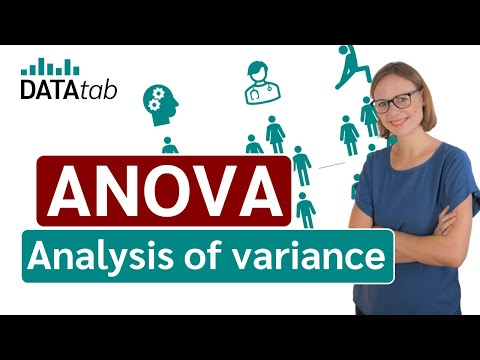

In [ ]:
from IPython.display import YouTubeVideo 
YouTubeVideo('0NwA9xxxtHw')

In [11]:
# NoOfData = int(FeatureData.shape[1]/3)
FeatureData_Normal     = FeatureData.iloc[ : ,            :   NoOfData ]
FeatureData_Abnormal_1 = FeatureData.iloc[ : ,   NoOfData : 2*NoOfData ]
FeatureData_Abnormal_2 = FeatureData.iloc[ : , 2*NoOfData :            ]

FeatureData_Normal.shape, FeatureData_Abnormal_1.shape, FeatureData_Abnormal_2.shape

((270, 180), (270, 180), (270, 180))

In [12]:
NoOfFeature = FeatureData.shape[0] # Number of feature: 270

P_value = np.zeros((NoOfFeature , 2))

# ANOVA Test (Result: p-value)
for i in np.arange(NoOfFeature):
    
    ANOVA           = np.array(sp.f_oneway(FeatureData_Normal.iloc[i,:] , FeatureData_Abnormal_1.iloc[i,:], FeatureData_Abnormal_2.iloc[i,:]))
    P_value[i,0] = i          # Index of feature (0~269)
    P_value[i,1] = ANOVA[1]   # P-value

P_value = pd.DataFrame(P_value)  # Convert ANOVA(p-value) result into DataFrame
P_value_Rank = P_value.sort_values([1],ascending=True)  # Sort by P-value in ascending order
P_value_Rank.to_csv('/content/drive/MyDrive/Colab Notebooks/SavedFiles/ML8/P_value_Rank_ANOVA.csv', sep=',', header=None, index=None) # Save the ANOVA result

### Confirm Probabilistic Density Function (PDF) with Histogram for each feature

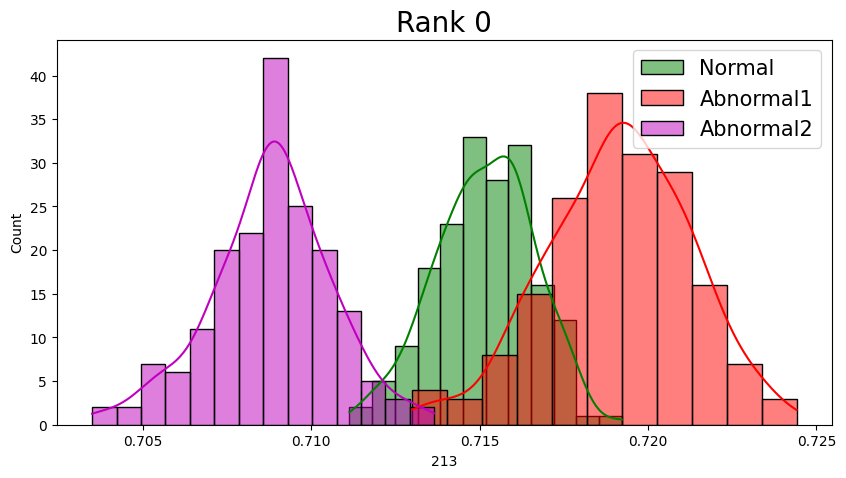

In [13]:
# Select the rank of P-value (0 ~ 269)
FeatureRank = 0

# PDF graphs and histograms
plt.figure(figsize=(10,5))
sb.histplot(FeatureData_Normal.iloc[int(P_value_Rank.iloc[FeatureRank,0])    ,:], label = 'Normal'   , color = 'g', kde=True)
sb.histplot(FeatureData_Abnormal_1.iloc[int(P_value_Rank.iloc[FeatureRank,0]),:], label = 'Abnormal1', color = 'r', kde=True)
sb.histplot(FeatureData_Abnormal_2.iloc[int(P_value_Rank.iloc[FeatureRank,0]),:], label = 'Abnormal2', color = 'm', kde=True)
plt.title(f'Rank {FeatureRank}', fontsize=20)
plt.legend(loc='upper right', fontsize=15)
plt.show()

### Select top 30 features based on P-value
- You can select other numbers if you want

In [14]:
Rank = 30  # Select number of rank

Normal     = np.zeros((Rank,NoOfData))
Abnormal_1 = np.zeros((Rank,NoOfData))
Abnormal_2 = np.zeros((Rank,NoOfData))

for i in range(Rank):
    
    index           = int(P_value_Rank.iloc[i,0])
    Normal[i,:]     = FeatureData_Normal.iloc[index,:].values
    Abnormal_1[i,:] = FeatureData_Abnormal_1.iloc[index,:].values
    Abnormal_2[i,:] = FeatureData_Abnormal_2.iloc[index,:].values
   
FeatureSelected = pd.DataFrame(np.concatenate([Normal, Abnormal_1, Abnormal_2] , axis=1))
FeatureSelected.to_csv('/content/drive/MyDrive/Colab Notebooks/SavedFiles/ML8/FeatureSelected.csv', header=None, index=None)
FeatureSelected.shape

(30, 540)

.

.

.

.

# Prepare Data and Labels for Machine Learning Modeling

In [15]:
# FeatureSelected = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/SavedFiles/ML8/FeatureSelected.csv', header=None)
FeatureSelected = FeatureSelected.T
FeatureSelected.shape

(540, 30)

In [16]:
from sklearn.preprocessing import StandardScaler

FeatureSelected_std = StandardScaler().fit_transform(FeatureSelected)
FeatureSelected_std.shape

(540, 30)

In [17]:
# Number of data for each condition: 180
NoOfData   = int(FeatureSelected_std.shape[0]/3)

# Separate the dataset into normal abnormal_1, and abnormal_2
NormalSet     = FeatureSelected_std[            :   NoOfData , :]
AbnormalSet_1 = FeatureSelected_std[   NoOfData : 2*NoOfData , :]
AbnormalSet_2 = FeatureSelected_std[ 2*NoOfData :            , :]

NormalSet.shape, AbnormalSet_1.shape, AbnormalSet_2.shape

((180, 30), (180, 30), (180, 30))

In [18]:
from sklearn.model_selection    import train_test_split

# Define the test data ratio
TestData_Ratio = 0.2 

# Split the normal and abnormal sets into training and test sets
TrainData_Nor  , TestData_Nor   = train_test_split(NormalSet    , test_size=TestData_Ratio, random_state=777)
TrainData_Abn_1, TestData_Abn_1 = train_test_split(AbnormalSet_1, test_size=TestData_Ratio, random_state=777)
TrainData_Abn_2, TestData_Abn_2 = train_test_split(AbnormalSet_2, test_size=TestData_Ratio, random_state=777)

print(TrainData_Nor.shape, TestData_Nor.shape)
print(TrainData_Abn_1.shape, TestData_Abn_1.shape)
print(TrainData_Abn_2.shape, TestData_Abn_2.shape)

(144, 30) (36, 30)
(144, 30) (36, 30)
(144, 30) (36, 30)


In [19]:
# Create labels for the training and test sets
TrainLabel_Nor   = np.zeros( TrainData_Nor.shape[0])     # 0: Normal
TrainLabel_Abn_1 = np.ones(TrainData_Abn_1.shape[0])     # 1: Abnormal_1
TrainLabel_Abn_2 = np.full(TrainData_Abn_2.shape[0], 2)  # 2: Abnormal_2

TestLabel_Nor    = np.zeros( TestData_Nor.shape[0])      # 0: Normal
TestLabel_Abn_1  = np.ones(TestData_Abn_1.shape[0])      # 1: Abnormal_1
TestLabel_Abn_2  = np.full(TestData_Abn_2.shape[0], 2)   # 2: Abnormal_2

print(TrainLabel_Nor.shape, TestLabel_Nor.shape)
print(TrainLabel_Abn_1.shape, TestLabel_Abn_1.shape)
print(TrainLabel_Abn_2.shape, TestLabel_Abn_2.shape)

(144,) (36,)
(144,) (36,)
(144,) (36,)


In [20]:
# Combine the normal and abnormal_1,2  data/labels
TrainData  = np.concatenate([TrainData_Nor , TrainData_Abn_1 , TrainData_Abn_2 ], axis=0)
TestData   = np.concatenate([TestData_Nor  , TestData_Abn_1  , TestData_Abn_2  ], axis=0)
TrainLabel = np.concatenate([TrainLabel_Nor, TrainLabel_Abn_1, TrainLabel_Abn_2], axis=0)
TestLabel  = np.concatenate([TestLabel_Nor , TestLabel_Abn_1 , TestLabel_Abn_2 ], axis=0)

print(TrainData.shape,  TestData.shape)
print(TrainLabel.shape, TestLabel.shape)

(432, 30) (108, 30)
(432,) (108,)


.

.

.

.

# Train Machine Learning Model (SVM)

- Set kernel type as 'rbf'
- Set C as 1
- Set gamma as 1
- Save the trained SVM model in 'ML8' folder
- Get the predicted(classified) result of test data: 'Predicted'
- Confirm the accurcy of 'Predicted' results

In [21]:
from sklearn import svm, metrics
import joblib

svmModel = svm.SVC(kernel='rbf', C=1, gamma=1)
svmModel.fit(TrainData, TrainLabel)
joblib.dump(svmModel, '/content/drive/MyDrive/Colab Notebooks/SavedFiles/ML8/SVM_model.plk')

Accuracy = svmModel.score(TestData, TestLabel)

Predicted = np.array(svmModel.predict(TestData))
print(f"Test data prediction accuracy: {metrics.accuracy_score(Predicted, TestLabel):.3f}")

Test data prediction accuracy: 0.880


.

.

.

.
# Confusion Matrix and Evaluation Metrics

We applied the concepts of True Positive (TP), True Negative (TN), False Positive (FP), and False Negative (FN) for the binary classification (Normal vs Abnormal). However, these concepts can be extended to multi-class classification problems as well.

In a multi-class problem with three classes (A, B, and C), you can calculate the evaluation metrics for each class by treating that class as the positive class and the other classes as negative. You can then compute the metrics for each class separately and average them using the methods I described in my previous response.

Here's a breakdown of how to calculate TP, TN, FP, and FN for each class:

1. Class A as positive:

  - TP: Number of samples correctly classified as class A.
  - TN: Number of samples correctly classified as class B or class C.
  - FP: Number of samples from classes B or C that are incorrectly classified as class A.
  - FN: Number of samples from class A that are incorrectly classified as class B or class C.

2. Class B as positive:

  - TP: Number of samples correctly classified as class B.
  - TN: Number of samples correctly classified as class A or class C.
  - FP: Number of samples from classes A or C that are incorrectly classified as class B.
  - FN: Number of samples from class B that are incorrectly classified as class A or class C.

3. Class C as positive:

  - TP: Number of samples correctly classified as class C.
  - TN: Number of samples correctly classified as class A or class B.
  - FP: Number of samples from classes A or B that are incorrectly classified as class C.
  - FN: Number of samples from class C that are incorrectly classified as class A or class B.
  
After calculating the evaluation metrics for each class individually, you can average them using the 'micro', 'macro', or 'weighted' methods as mentioned earlier.





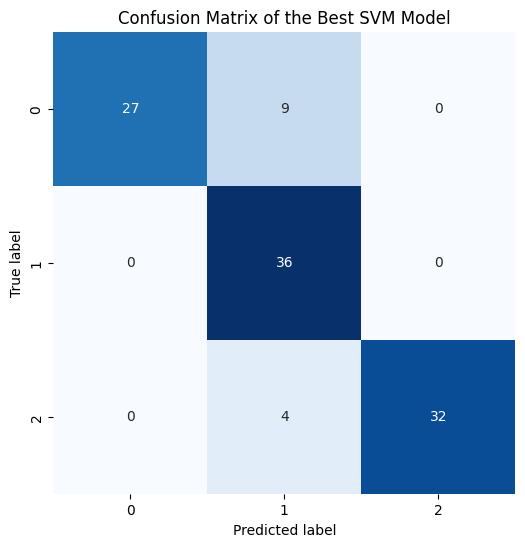

In [24]:
# Calculate and plot the confusion matrix (Same as the binary classification)
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(TestLabel, Predicted)

plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap=plt.cm.Blues, cbar=False, square=True)
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title("Confusion Matrix of the Best SVM Model")
plt.show()

In [23]:
# Calculate evaluation metrics
accuracy  = metrics.accuracy_score(TestLabel, Predicted)
precision = metrics.precision_score(TestLabel, Predicted, average='macro')  # You can try different avaraging method such as 'micro' and 'weighted'
recall    = metrics.recall_score(TestLabel, Predicted   , average='macro')
f1_score  = metrics.f1_score(TestLabel, Predicted       , average='macro')

# Print the evaluation metrics
print(f"Best Model Evaluation:\n")
print(f"Accuracy : {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall   : {recall:.2f}")
print(f"F1 Score : {f1_score:.2f}")

Best Model Evaluation:

Accuracy : 0.88
Precision: 0.91
Recall   : 0.88
F1 Score : 0.88
